In [1]:
import pandas as pd
import numpy as np
import re
import string

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

In [3]:
# 2. Load Dataset

df = pd.read_csv("train.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
print(df.columns)


Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')


In [5]:
# 3. EDA (Exploratory Data Analysis)
print(df['comment_text'].iloc[0])   # contoh komentar
print(df.iloc[0, 2:])               # contoh label

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 0, dtype: object


<Axes: title={'center': 'Distribusi Label'}>

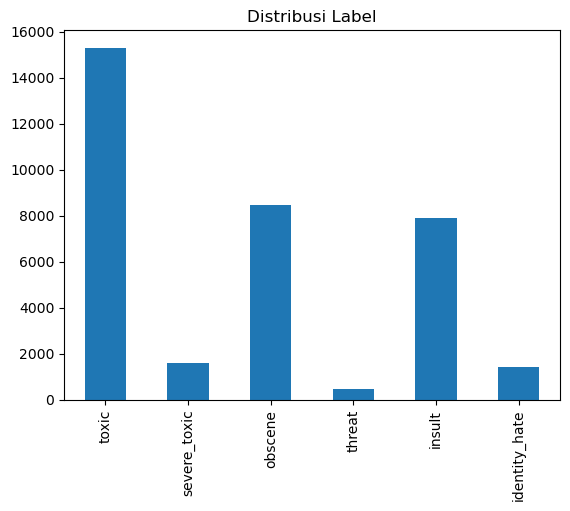

In [6]:
# Cek distribusi label
label_cols = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
df[label_cols].sum().plot(kind="bar", title="Distribusi Label")

In [7]:
# 4. Preprocessing Teks
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"\n", " ", text)                # hapus newline
    text = re.sub(r"http\S+|www\S+", "", text)     # hapus URL
    text = re.sub(r"@\w+", "", text)               # hapus mention
    text = re.sub(r"[^a-z\s]", "", text)           # hapus angka & tanda baca
    return text


In [8]:
df['clean_text'] = df['comment_text'].apply(clean_text)


In [9]:
# 5. Split Data
X = df['clean_text']
y = df[label_cols]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# 6. TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=50000, stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

In [ ]:
# 7. Train Model (Logistic Regression + OneVsRest)
model = OneVsRestClassifier(LogisticRegression(max_iter=300))
model.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=300))